In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Dense,Input,MaxPool2D,Conv2D,Dropout,BatchNormalization,Flatten
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from keras.datasets import mnist
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import models
import os
import cv2
from keras.applications import ResNet50V2,VGG16,ResNet50

### Data Preprocessing [ convert all images from different sizes to 512 x 512 size ]

In [9]:
import cv2
import os
def resize_images(source_path,destination_path,width=256,height=256):
    try:
        count = 0
        for filename in os.listdir(source_path):
            img = cv2.imread(os.path.join(source_path,filename),cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (width, height)) 
            if img.shape != None:
               cv2.imwrite(destination_path+filename, img)
               count = count + 1
    except Exception as e:
        print("Exception :{}".format(e))

In [10]:
## Convert train dataset images to 256 x 256
for categoryType in ["NORMAL","PNEUMONIA"]:
    print(categoryType)
    source_path = "G:\\Ajay\\dataset\\CNN\\Pneumonia Detection\\chest_xray\\train\\"+str(categoryType)+"\\"
    destination_path = "G:\\Ajay\\dataset\\CNN\\Pneumonia Detection\\resize\\chest_xray\\train\\"+str(categoryType)+"\\"
    resize_images(source_path,destination_path,width=256,height=256)

NORMAL
PNEUMONIA


In [11]:
## Convert test dataset images to 256 x 256
for categoryType in ["NORMAL","PNEUMONIA"]:
    print(categoryType)
    source_path = "G:\\Ajay\\dataset\\CNN\\Pneumonia Detection\\chest_xray\\test\\"+str(categoryType)+"\\"
    destination_path = "G:\\Ajay\\dataset\\CNN\\Pneumonia Detection\\resize\\chest_xray\\test\\"+str(categoryType)+"\\"
    resize_images(source_path,destination_path,width=256,height=256)

NORMAL
PNEUMONIA


#### Read chest_xray dataset

In [12]:
train_dataset_dir = "G:\\Ajay\\dataset\\CNN\\Pneumonia Detection\\resize\\chest_xray\\train"
test_dataset_dir = "G:\\Ajay\\dataset\\CNN\\Pneumonia Detection\\resize\\chest_xray\\test"

In [13]:
def model_custom(input):
    ## VGG16 - Block 1
    x =  Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_1")(input)
    x =  MaxPool2D(pool_size=(2,2),strides=(2,2),name="maxpool2d_3")(x)
    x = Dropout(0.3)(x)
    
    ## VGG16 - Block 2
    x =  Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_4")(x)
    x =  MaxPool2D(pool_size=(2,2),strides=(2,2),name="maxpool2d_6")(x)
    x = Dropout(0.3)(x)
    
    ## VGG16 - Block 3
    x =  Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_5.1")(x)
    x =  MaxPool2D(pool_size=(2,2),strides=(2,2),name="maxpool2d_8")(x)
    x = Dropout(0.2)(x)
    
    ## VGG16 - Block 4
    x =  Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_9")(x)
    x =  MaxPool2D(pool_size=(2,2),strides=(2,2),name="maxpool2d_12")(x)
    x = Dropout(0.3)(x)

    return x
    

In [14]:
input = Input(shape=(256, 256, 3))
x = model_custom(input)
x = Flatten()(x)
x = Dense(units=128,activation="relu",name="fc_17")(x)
x = Dense(units=64,activation="relu",name="fc_18")(x)
x = Dense(units=32,activation="relu",name="fc_19")(x)
output = Dense(units=1,activation="sigmoid",name="output_layer")(x)
model = Model(input,output)
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
datagen = ImageDataGenerator(rescale=1.0/255)
training_set = datagen.flow_from_directory(directory=train_dataset_dir,target_size=(256, 256),classes=["NORMAL","PNEUMONIA"],class_mode="binary")
testing_set = datagen.flow_from_directory(directory=test_dataset_dir,target_size=(256, 256),classes=["NORMAL","PNEUMONIA"],class_mode="binary")

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
history = model.fit(training_set,epochs=20,batch_size=50,validation_data=testing_set)

Epoch 1/20
164/164 [==============================] - 33s 186ms/step - loss: 0.1038 - accuracy: 0.9602 - val_loss: 20.1162 - val_accuracy: 0.6250
Epoch 2/20
164/164 [==============================] - 11s 68ms/step - loss: 6.0279e-09 - accuracy: 1.0000 - val_loss: 20.1072 - val_accuracy: 0.6250
Epoch 3/20
164/164 [==============================] - 11s 68ms/step - loss: 4.1376e-09 - accuracy: 1.0000 - val_loss: 20.0956 - val_accuracy: 0.6250
Epoch 4/20
164/164 [==============================] - 11s 68ms/step - loss: 2.4999e-09 - accuracy: 1.0000 - val_loss: 20.0848 - val_accuracy: 0.6250
Epoch 5/20
164/164 [==============================] - 11s 68ms/step - loss: 2.8875e-09 - accuracy: 1.0000 - val_loss: 20.0560 - val_accuracy: 0.6250
Epoch 6/20
164/164 [==============================] - 11s 68ms/step - loss: 2.1001e-09 - accuracy: 1.0000 - val_loss: 20.0161 - val_accuracy: 0.6250
Epoch 7/20
164/164 [==============================] - 11s 68ms/step - loss: 1.9887e-09 - accuracy: 1.0000 - v

In [10]:
def plot_learning_curve(history,epoch):
    epochs = range(1,epoch+1)
    plt.figure(figsize=(4,2))
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("train vs test accuracy")
    plt.plot(epochs,history.history["accuracy"],'b')
    plt.plot(epochs,history.history["val_accuracy"],'g')
    plt.legend(["Train acc","Validation acc"])
    plt.show()

    plt.figure(figsize=(4,2))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("train vs test loss")
    plt.plot(epochs,history.history["loss"],'b')
    plt.plot(epochs,history.history["val_loss"],'g')
    plt.legend(["Train loss","Validation loss"])

    plt.show()

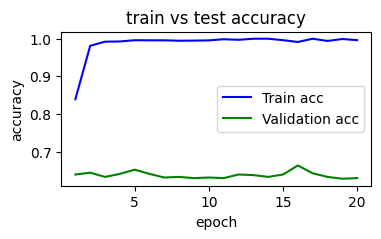

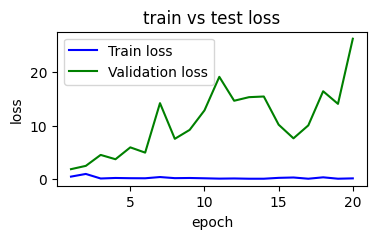

In [11]:
plot_learning_curve(history,20)

#### CNN Architecture - VGG16 

In [18]:
def model_vgg16(input):
    ## VGG16 - Block 1
    x =  Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_1")(input)
    x =  Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_2")(x)
    x =  MaxPool2D(pool_size=(2,2),strides=(2,2),name="maxpool2d_3")(x)
    
    ## VGG16 - Block 2
    x =  Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_4")(x)
    x =  Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_5")(x)
    x =  MaxPool2D(pool_size=(2,2),strides=(2,2),name="maxpool2d_6")(x)
    
    ## VGG16 - Block 3
    x =  Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_5.1")(x)
    x =  Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_6")(x)
    x =  Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_7")(x)
    x =  MaxPool2D(pool_size=(2,2),strides=(2,2),name="maxpool2d_8")(x)
    
    ## VGG16 - Block 4
    x =  Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_9")(x)
    x =  Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_10")(x)
    x =  Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_11")(x)
    x =  MaxPool2D(pool_size=(2,2),strides=(2,2),name="maxpool2d_12")(x)
    
    ## VGG16 - Block 5
    x =  Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_13")(x)
    x =  Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_14")(x)
    x =  Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",name="conv2d_15")(x)
    x =  MaxPool2D(pool_size=(2,2),strides=(2,2),name="maxpool2d_16")(x)
    return x
    

In [22]:
input = Input(shape=(256, 256, 3))
x = model_vgg16(input)
x = Flatten()(x)
x = Dense(units=32,activation="relu",name="fc_17")(x)
x = Dense(units=16,activation="relu",name="fc_18")(x)
output = Dense(units=1,activation="sigmoid",name="output_layer")(x)
model = Model(input,output)
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [23]:
datagen = ImageDataGenerator(rescale=1.0/255)
training_set = datagen.flow_from_directory(directory=train_dataset_dir,target_size=(256, 256),classes=["NORMAL","PNEUMONIA"],class_mode="binary")
testing_set = datagen.flow_from_directory(directory=test_dataset_dir,target_size=(256, 256),classes=["NORMAL","PNEUMONIA"],class_mode="binary")

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [24]:
history = model.fit(training_set,epochs=20,batch_size=50,validation_data=testing_set)

Epoch 1/20
164/164 [==============================] - 69s 416ms/step - loss: 0.6135 - accuracy: 0.7414 - val_loss: 0.6884 - val_accuracy: 0.6250
Epoch 2/20
164/164 [==============================] - 61s 370ms/step - loss: 0.5734 - accuracy: 0.7422 - val_loss: 0.7189 - val_accuracy: 0.6250
Epoch 3/20
164/164 [==============================] - 61s 371ms/step - loss: 0.5722 - accuracy: 0.7422 - val_loss: 0.6778 - val_accuracy: 0.6250
Epoch 4/20
164/164 [==============================] - 61s 371ms/step - loss: 0.5720 - accuracy: 0.7422 - val_loss: 0.7245 - val_accuracy: 0.6250
Epoch 5/20
164/164 [==============================] - 61s 373ms/step - loss: 0.5727 - accuracy: 0.7422 - val_loss: 0.7133 - val_accuracy: 0.6250
Epoch 6/20
164/164 [==============================] - 61s 371ms/step - loss: 0.5725 - accuracy: 0.7422 - val_loss: 0.7120 - val_accuracy: 0.6250
Epoch 7/20
164/164 [==============================] - 61s 371ms/step - loss: 0.5722 - accuracy: 0.7422 - val_loss: 0.6788 - val_ac

In [30]:
def plot_learning_curve(history,epoch):
    epochs = range(1,epoch+1)
    plt.figure(figsize=(4,2))
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("train vs test accuracy")
    plt.plot(epochs,history.history["accuracy"],'b')
    plt.plot(epochs,history.history["val_accuracy"],'g')
    plt.legend(["Train acc","Validation acc"])
    plt.show()

    plt.figure(figsize=(4,2))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("train vs test loss")
    plt.plot(epochs,history.history["loss"],'b')
    plt.plot(epochs,history.history["val_loss"],'g')
    plt.legend(["Train loss","Validation loss"])

    plt.show()

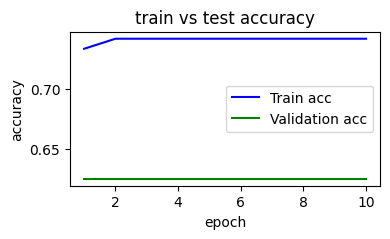

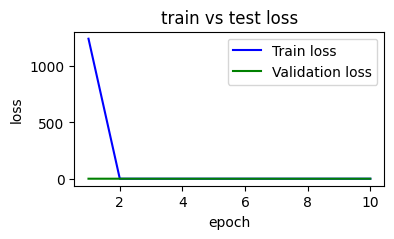

In [50]:
plot_learning_curve(history,10)

### Using Transfer learning - VGG16

In [28]:
### from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

flatten_layer = Flatten()
dense_layer_1 = Dense(256, activation='relu')
dropout1 = Dropout(0.2)

dense_layer_2 = Dense(128, activation='relu')
dropout2 = Dropout(0.2)

dense_layer_3 = Dense(64, activation='relu')
dropout3 = Dropout(0.2)

dense_layer_4 = Dense(32, activation='relu')
dropout4 = Dropout(0.2)

prediction_layer = Dense(1, activation='sigmoid')


Epoch 1/20
100/100 [==============================] - 40s 393ms/step - loss: 0.5874 - accuracy: 0.7456 - val_loss: 0.7105 - val_accuracy: 0.6250
Epoch 2/20
100/100 [==============================] - 39s 393ms/step - loss: 0.5724 - accuracy: 0.7475 - val_loss: 0.6946 - val_accuracy: 0.6250
Epoch 3/20
100/100 [==============================] - 41s 405ms/step - loss: 0.5682 - accuracy: 0.7466 - val_loss: 0.6883 - val_accuracy: 0.6250
Epoch 4/20
100/100 [==============================] - 41s 407ms/step - loss: 0.5734 - accuracy: 0.7443 - val_loss: 0.6968 - val_accuracy: 0.6250
Epoch 5/20
100/100 [==============================] - 40s 401ms/step - loss: 0.5819 - accuracy: 0.7350 - val_loss: 0.6803 - val_accuracy: 0.6250
Epoch 6/20
100/100 [==============================] - 40s 399ms/step - loss: 0.5688 - accuracy: 0.7481 - val_loss: 0.6947 - val_accuracy: 0.6250
Epoch 7/20
100/100 [==============================] - 41s 406ms/step - loss: 0.5673 - accuracy: 0.7484 - val_loss: 0.7074 - val_ac

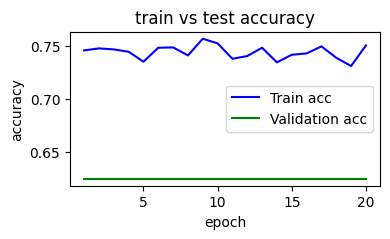

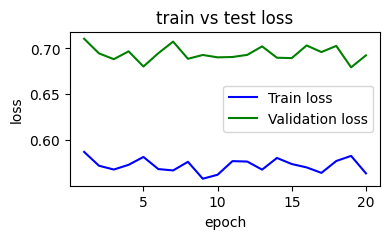

In [52]:
vgg16_tf_model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout1,
    dense_layer_2,
    dropout2,
    dense_layer_3,
    dropout3,
    dense_layer_4,
    dropout4,    
    prediction_layer
])
vgg16_tf_model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

vgg16_tranf_history = vgg16_tf_model.fit(training_set,batch_size=50,epochs=20,validation_data=testing_set,steps_per_epoch=100)
plot_learning_curve(vgg16_tranf_history,20)

### Using Transfer learning - ResNet50

Epoch 1/20
164/164 [==============================] - 19s 98ms/step - loss: 0.8705 - accuracy: 0.6988 - val_loss: 0.9651 - val_accuracy: 0.6250
Epoch 2/20
164/164 [==============================] - 15s 93ms/step - loss: 0.4070 - accuracy: 0.7418 - val_loss: 1.4235 - val_accuracy: 0.6250
Epoch 3/20
164/164 [==============================] - 15s 93ms/step - loss: 0.3838 - accuracy: 0.7422 - val_loss: 0.6773 - val_accuracy: 0.6250
Epoch 4/20
164/164 [==============================] - 15s 93ms/step - loss: 0.5976 - accuracy: 0.7422 - val_loss: 0.6833 - val_accuracy: 0.6250
Epoch 5/20
164/164 [==============================] - 15s 93ms/step - loss: 0.5746 - accuracy: 0.7422 - val_loss: 0.6925 - val_accuracy: 0.6250
Epoch 6/20
164/164 [==============================] - 15s 93ms/step - loss: 0.5736 - accuracy: 0.7422 - val_loss: 0.6957 - val_accuracy: 0.6250
Epoch 7/20
164/164 [==============================] - 15s 93ms/step - loss: 0.5747 - accuracy: 0.7422 - val_loss: 0.6942 - val_accuracy:

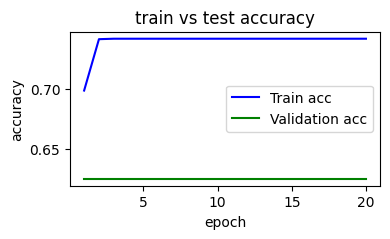

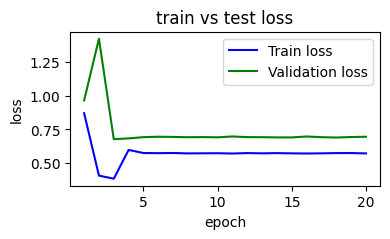

In [31]:
from keras.applications import ResNet50
base_resnet50 = ResNet50(weights="imagenet", include_top=False, input_shape=(256, 256, 3))
base_resnet50.trainable = False

flatten_layer = Flatten()
dense_layer_1 = Dense(128, activation='relu')
dropout1 = Dropout(0.4)
dense_layer_2 = Dense(64, activation='relu')
dropout2 = Dropout(0.3)
dense_layer_3 = Dense(32, activation='relu')
dropout3 = Dropout(0.3)
prediction_layer = Dense(1, activation='sigmoid')

from keras import models
resnet50_tranf = models.Sequential([
    base_resnet50,
    flatten_layer,
    dense_layer_1,
    dropout1,
    dense_layer_2,
    dropout2,
    dense_layer_3,
    dropout3,
    prediction_layer
])

resnet50_tranf.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

resnet50_tranf_history = resnet50_tranf.fit(training_set,batch_size=50,epochs=20,validation_data=testing_set)
plot_learning_curve(resnet50_tranf_history,20)

### Using Tranasfer learning - MobileNet

Epoch 1/20
164/164 [==============================] - 12s 66ms/step - loss: 0.1444 - accuracy: 0.9876 - val_loss: 70.9541 - val_accuracy: 0.6250
Epoch 2/20
164/164 [==============================] - 7s 44ms/step - loss: 0.0233 - accuracy: 0.9981 - val_loss: 57.4003 - val_accuracy: 0.6250
Epoch 3/20
164/164 [==============================] - 7s 44ms/step - loss: 0.0252 - accuracy: 0.9987 - val_loss: 49.6889 - val_accuracy: 0.6250
Epoch 4/20
164/164 [==============================] - 8s 46ms/step - loss: 0.0221 - accuracy: 0.9975 - val_loss: 59.9477 - val_accuracy: 0.6250
Epoch 5/20
164/164 [==============================] - 7s 43ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 58.3698 - val_accuracy: 0.6250
Epoch 6/20
164/164 [==============================] - 7s 44ms/step - loss: 0.0130 - accuracy: 0.9981 - val_loss: 74.7697 - val_accuracy: 0.6250
Epoch 7/20
164/164 [==============================] - 7s 43ms/step - loss: 0.0084 - accuracy: 0.9994 - val_loss: 103.9545 - val_accurac

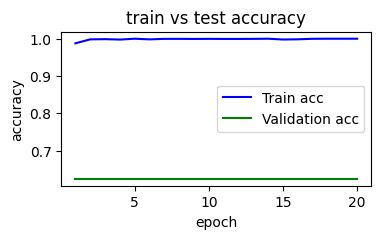

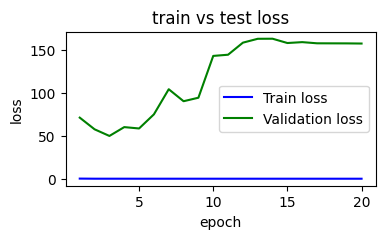

In [32]:
from keras.applications import MobileNet
base_mobileNet = MobileNet(weights="imagenet", include_top=False, input_shape=(256, 256, 3))
base_mobileNet.trainable = False

flatten_layer = Flatten()
dense_layer_1 = Dense(64, activation='relu')
dropout1 = Dropout(0.3)
dense_layer_2 = Dense(32, activation='relu')
dropout2 = Dropout(0.4)
prediction_layer = Dense(1, activation='sigmoid')


from keras import models
mobileNet_tranf = models.Sequential([
    base_mobileNet,
    flatten_layer,
    dense_layer_1,
    dropout1,
    dense_layer_2,
    dropout2,
    prediction_layer
])

mobileNet_tranf.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

mobileNet_tranf_history = mobileNet_tranf.fit(training_set,batch_size=32,epochs=20,validation_data=testing_set)

plot_learning_curve(mobileNet_tranf_history,20)

### ResNet50V2

In [34]:
base_model = ResNet50V2(weights = "imagenet",input_shape = (224, 224, 3),pooling = "max", include_top = False,classes = 2)
base_model.trainable=False

Epoch 1/10
164/164 [==============================] - 15s 76ms/step - loss: 0.3520 - accuracy: 0.9306 - val_loss: 10.0218 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 12s 71ms/step - loss: 0.0184 - accuracy: 0.9948 - val_loss: 12.7707 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 12s 71ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 15.6971 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 12s 71ms/step - loss: 0.0045 - accuracy: 0.9981 - val_loss: 19.0990 - val_accuracy: 0.6250
Epoch 5/10
164/164 [==============================] - 12s 71ms/step - loss: 0.0043 - accuracy: 0.9983 - val_loss: 24.7343 - val_accuracy: 0.6250
Epoch 6/10
164/164 [==============================] - 12s 71ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 25.4005 - val_accuracy: 0.6250
Epoch 7/10
164/164 [==============================] - 12s 71ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 29.4717 - val_ac

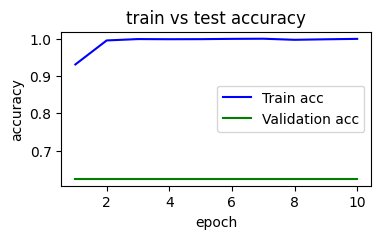

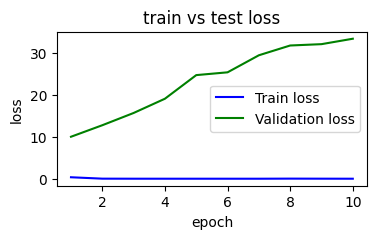

In [35]:
flatten_layer = Flatten()
dense_layer_1 = Dense(256, activation='relu')
dropout1 = Dropout(0.3)
dense_layer_2 = Dense(128, activation='relu')
dropout2 = Dropout(0.4)
dense_layer_3 = Dense(64, activation='relu')
dropout3 = Dropout(0.4)
dense_layer_4 = Dense(32, activation='relu')
dropout4 = Dropout(0.4)
prediction_layer = Dense(1, activation='sigmoid')


from keras import models
ResNet50V2_tranf = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout1,
    dense_layer_2,
    dropout2,
    dense_layer_3,
    dropout3,
    dense_layer_4,
    dropout4,
    prediction_layer
])

ResNet50V2_tranf.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

ResNet50V2_tranf_history = ResNet50V2_tranf.fit(training_set,batch_size=32,epochs=10,validation_data=testing_set)

plot_learning_curve(ResNet50V2_tranf_history,10)